<a href="https://colab.research.google.com/github/CD-AC/DataScience-Sales_Prediction/blob/main/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libreries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
!pip install prophet
from prophet import Prophet

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Dataset Sales

In [3]:
sales_train_df = pd.read_csv("/content/drive/MyDrive/sales_prediction/train.csv")

<ipython-input-3-d2bcef0afa61>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_train_df = pd.read_csv("/content/drive/MyDrive/sales_prediction/train.csv")


In [4]:
sales_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
sales_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [6]:
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


# Import Dataset Stores

In [7]:
store_info_df = pd.read_csv("/content/drive/MyDrive/sales_prediction/store.csv")

In [8]:
store_info_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [9]:
store_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [10]:
store_info_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


# Exploratory Data Analysis Dataset Sales

<Axes: >

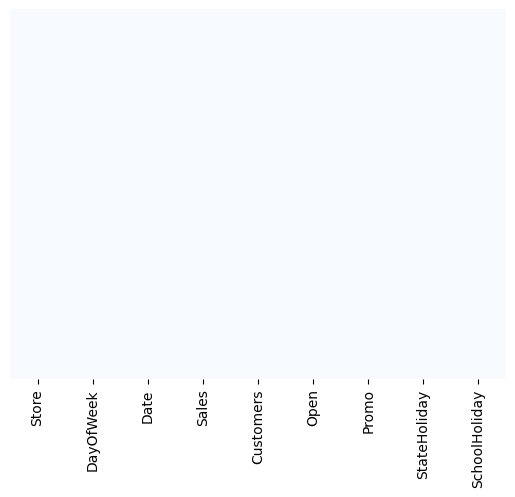

In [11]:
sns.heatmap(sales_train_df.isnull(), yticklabels = False, cbar = False, cmap = "Blues")

array([[<Axes: title={'center': 'Store'}>,
        <Axes: title={'center': 'DayOfWeek'}>,
        <Axes: title={'center': 'Sales'}>],
       [<Axes: title={'center': 'Customers'}>,
        <Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'Promo'}>],
       [<Axes: title={'center': 'SchoolHoliday'}>, <Axes: >, <Axes: >]],
      dtype=object)

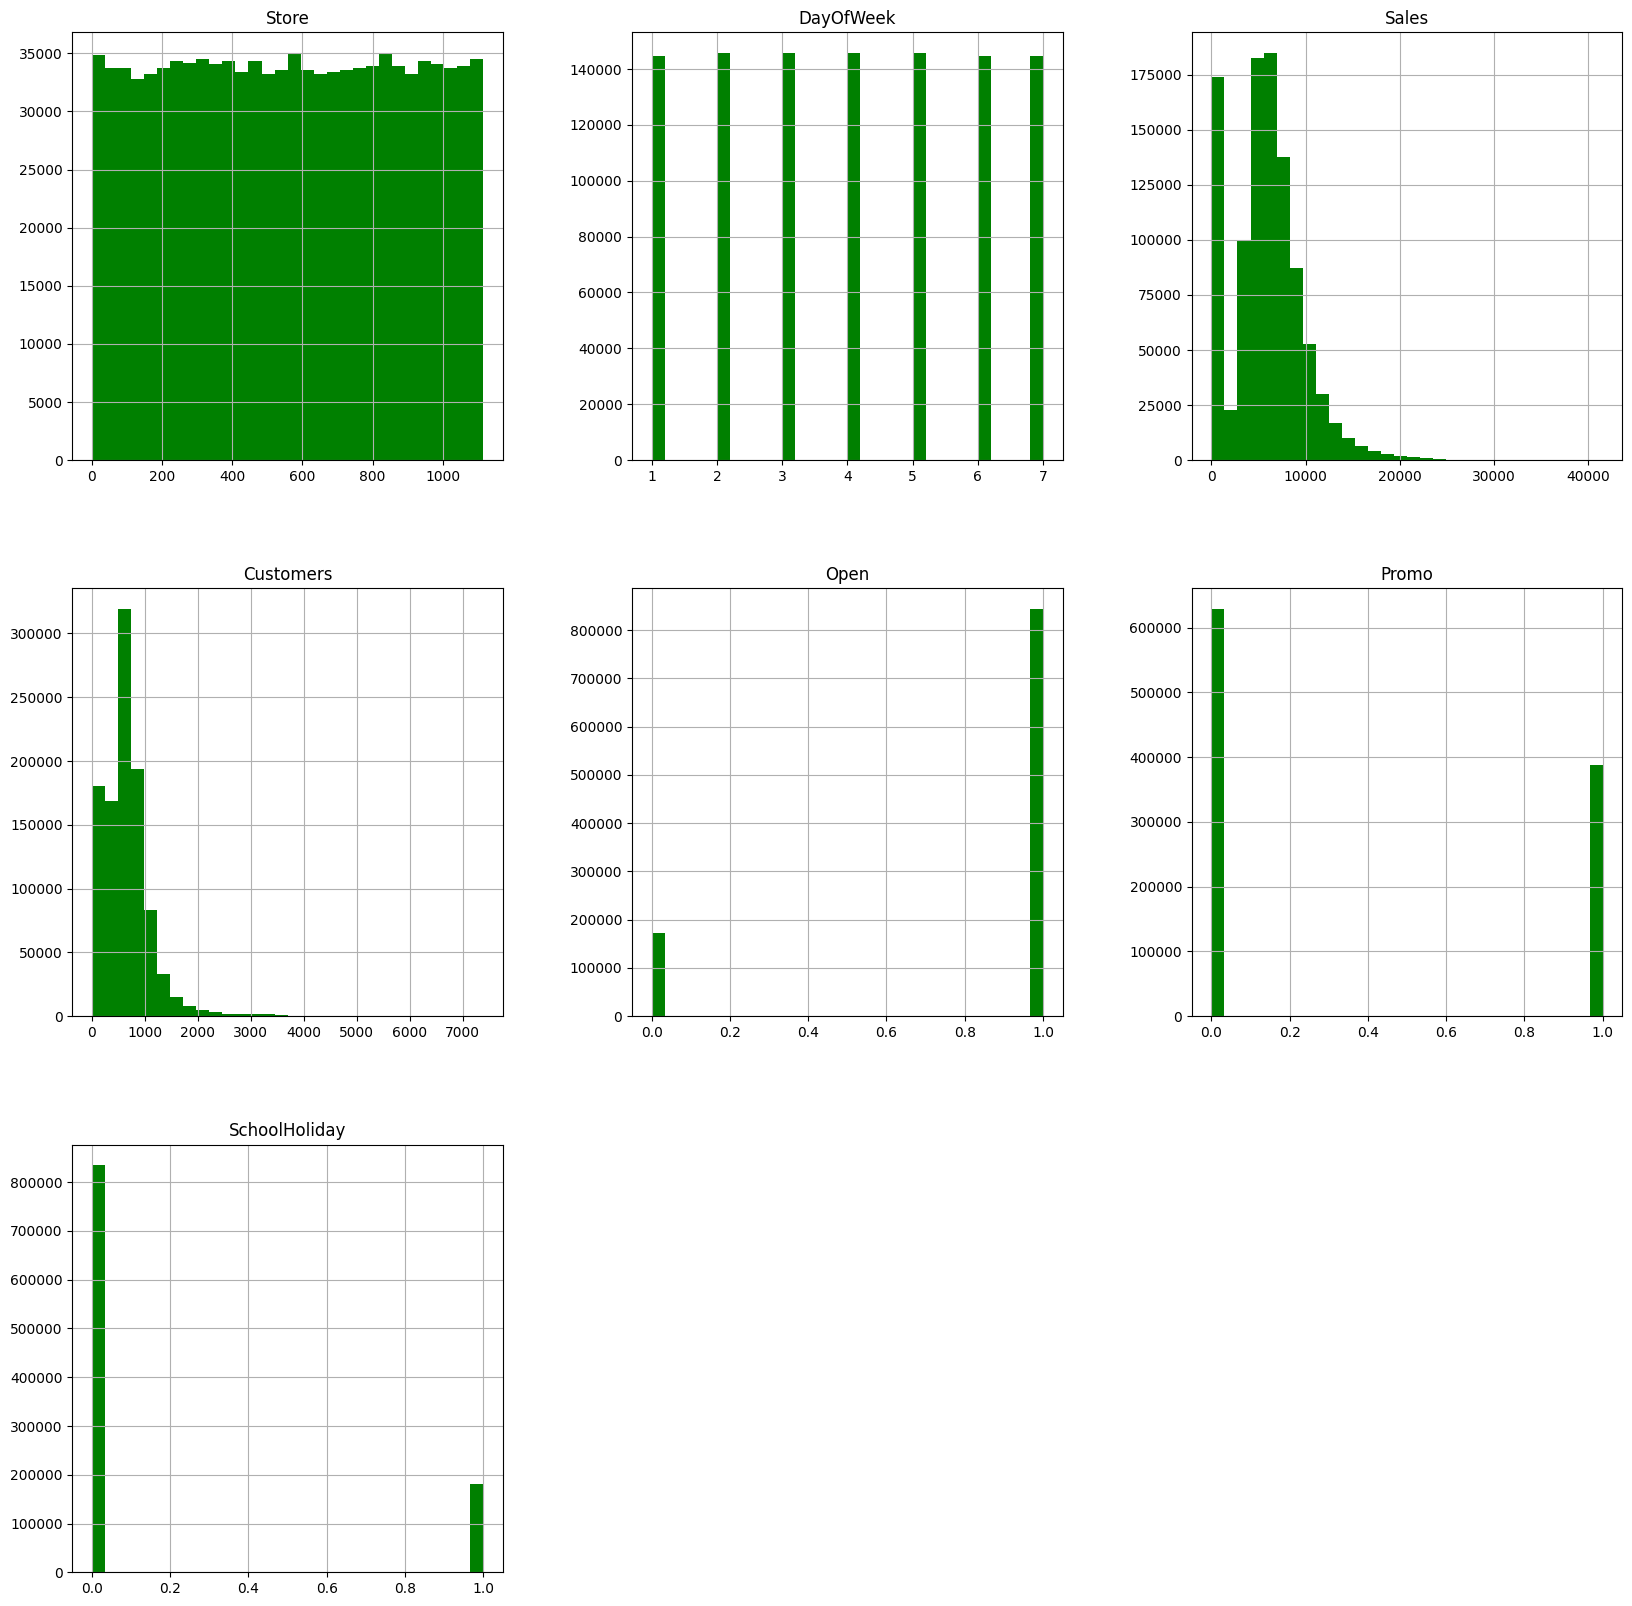

In [12]:
sales_train_df.hist(bins = 30, figsize= (20, 20), color = 'g' )

In [13]:
closed_train_df = sales_train_df[sales_train_df['Open'] == 0]
open_train_df   = sales_train_df[sales_train_df['Open'] == 1]

In [14]:
print("Total = {} ".format(len(sales_train_df)))
print("Number of stores open = {}".format(len(open_train_df)))
print("Number of stores closed = {}".format(len(closed_train_df)))
print("Percentage of stores closed = {}%".format (100.0*len(closed_train_df)/ len(sales_train_df)))

Total = 1017209 
Number of stores open = 844392
Number of stores closed = 172817
Percentage of stores closed = 16.98933060954042%


In [15]:
sales_train_df = sales_train_df[sales_train_df['Open'] == 1]

In [16]:
sales_train_df.drop(['Open'], axis= 1, inplace= True)

In [17]:
sales_train_df

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1
...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,0,a,1
1016827,733,2,2013-01-01,10765,2377,0,a,1
1016863,769,2,2013-01-01,5035,1248,0,a,1
1017042,948,2,2013-01-01,4491,1039,0,a,1


In [18]:
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000
mean,558.422920,3.520361,6955.514291,762.728395,0.446352,0.193580
std,321.731914,1.723689,3104.214680,401.227674,0.497114,0.395103
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,0.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,0.000000,0.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000


# Exploratory Data Analysis Dataset Store

<Axes: >

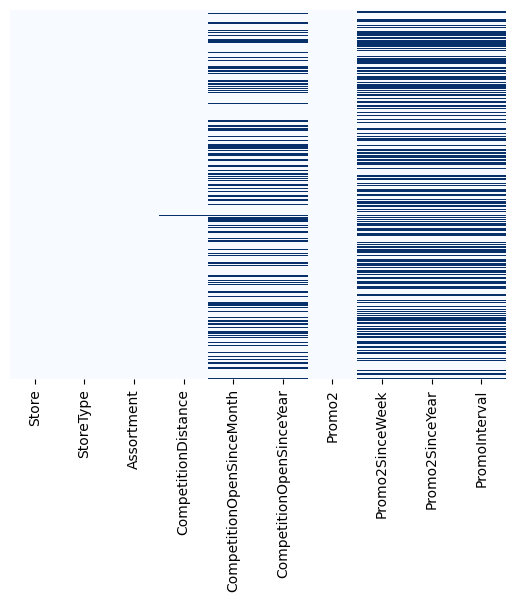

In [19]:
sns.heatmap(store_info_df.isnull(), yticklabels= False, cbar= False, cmap= 'Blues')

In [21]:
store_info_df[store_info_df['CompetitionDistance'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [22]:
store_info_df[store_info_df['CompetitionOpenSinceMonth'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [23]:
store_info_df[store_info_df['Promo2'] == 0]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


In [24]:
str_cols = ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth']

for str in str_cols:
    store_info_df[str].fillna(0, inplace = True)

<Axes: >

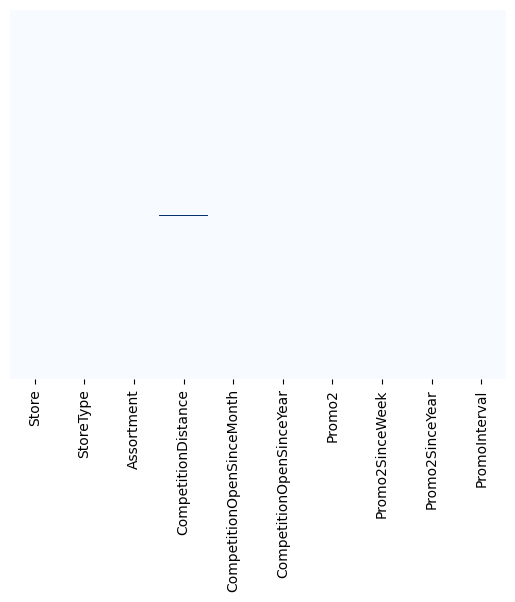

In [25]:
sns.heatmap(store_info_df.isnull(), yticklabels=False, cbar=False, cmap = "Blues")

In [26]:
store_info_df['CompetitionDistance'].fillna(store_info_df['CompetitionDistance'].mean(), inplace=True)

<Axes: >

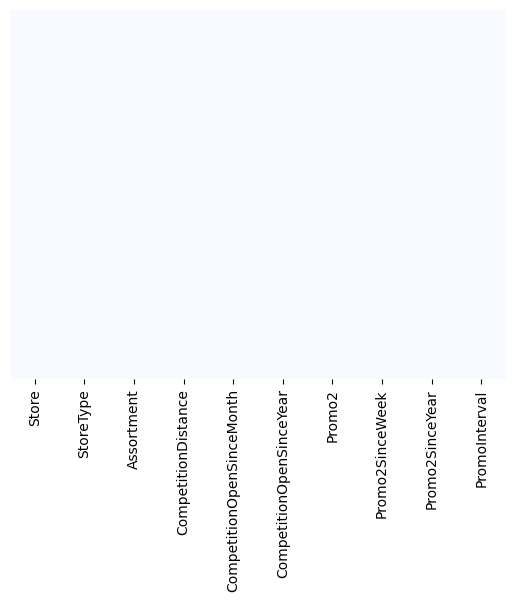

In [27]:
sns.heatmap(store_info_df.isnull(), yticklabels=False, cbar=False, cmap = "Blues")

array([[<Axes: title={'center': 'Store'}>,
        <Axes: title={'center': 'CompetitionDistance'}>,
        <Axes: title={'center': 'CompetitionOpenSinceMonth'}>],
       [<Axes: title={'center': 'CompetitionOpenSinceYear'}>,
        <Axes: title={'center': 'Promo2'}>,
        <Axes: title={'center': 'Promo2SinceWeek'}>],
       [<Axes: title={'center': 'Promo2SinceYear'}>, <Axes: >, <Axes: >]],
      dtype=object)

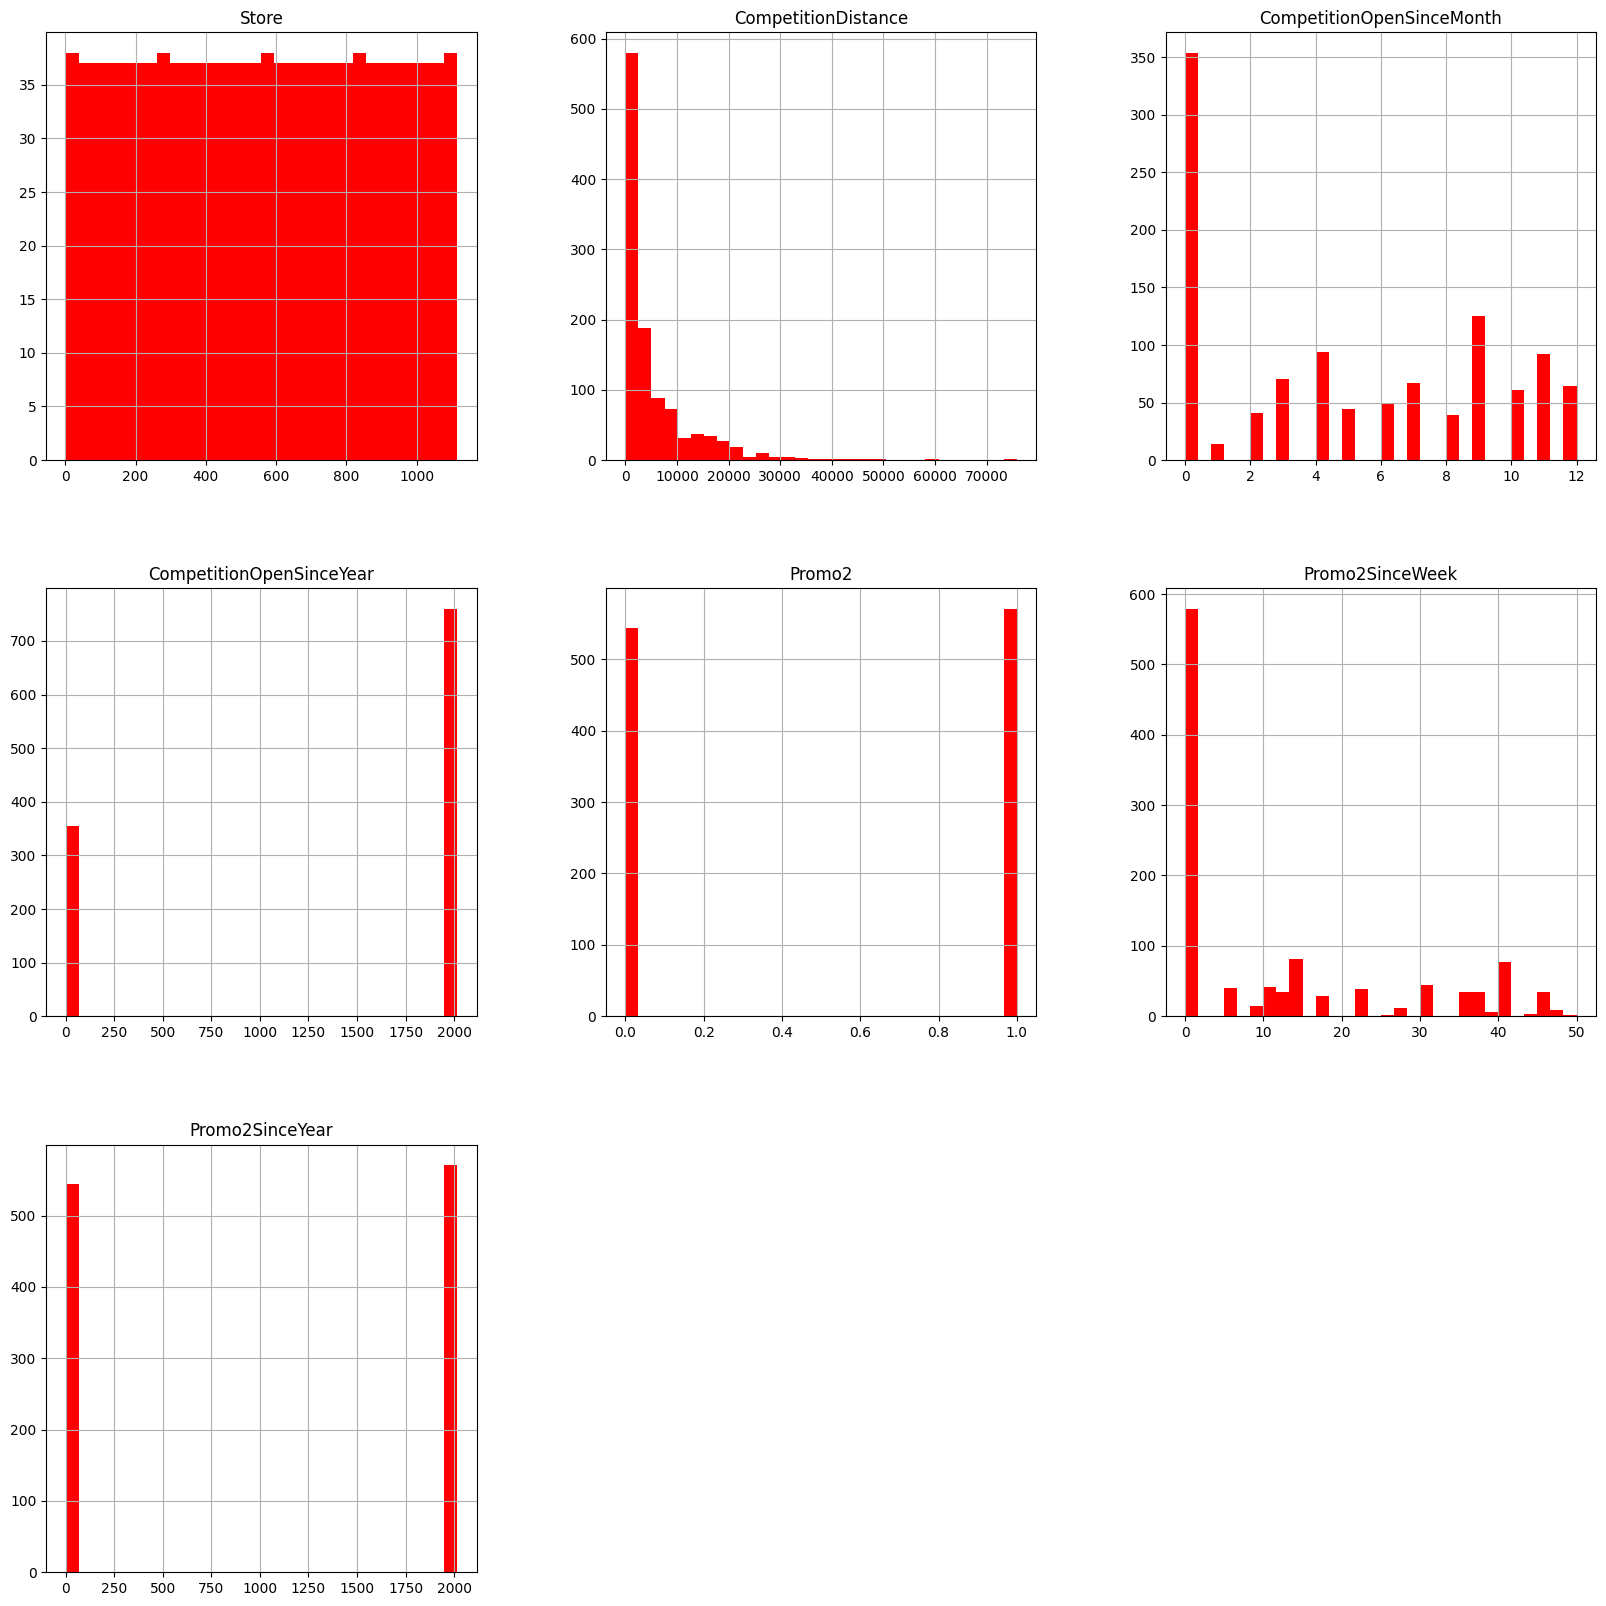

In [28]:
store_info_df.hist(bins = 30, figsize=(20,20), color = 'r')

# Join Datasets

In [29]:
sales_train_all_df = pd.merge(sales_train_df, store_info_df, how = 'inner', on = 'Store')

In [30]:
sales_train_all_df.to_csv('test.csv', index = False)

In [32]:
sales_train_all_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [33]:
sales_train_all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844392 entries, 0 to 844391
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      844392 non-null  int64  
 1   DayOfWeek                  844392 non-null  int64  
 2   Date                       844392 non-null  object 
 3   Sales                      844392 non-null  int64  
 4   Customers                  844392 non-null  int64  
 5   Promo                      844392 non-null  int64  
 6   StateHoliday               844392 non-null  object 
 7   SchoolHoliday              844392 non-null  int64  
 8   StoreType                  844392 non-null  object 
 9   Assortment                 844392 non-null  object 
 10  CompetitionDistance        844392 non-null  float64
 11  CompetitionOpenSinceMonth  844392 non-null  float64
 12  CompetitionOpenSinceYear   844392 non-null  float64
 13  Promo2                     84

In [34]:
numeric_columns = sales_train_all_df.select_dtypes(include=['int64', 'float64'])
correlations = numeric_columns.corr()['Sales'].sort_values()
correlations

DayOfWeek                   -0.178736
Promo2SinceYear             -0.127621
Promo2                      -0.127596
Promo2SinceWeek             -0.058476
CompetitionDistance         -0.036343
CompetitionOpenSinceMonth   -0.018370
CompetitionOpenSinceYear     0.005266
Store                        0.007710
SchoolHoliday                0.038617
Promo                        0.368145
Customers                    0.823597
Sales                        1.000000
Name: Sales, dtype: float64

# Data Visualization

<Axes: >

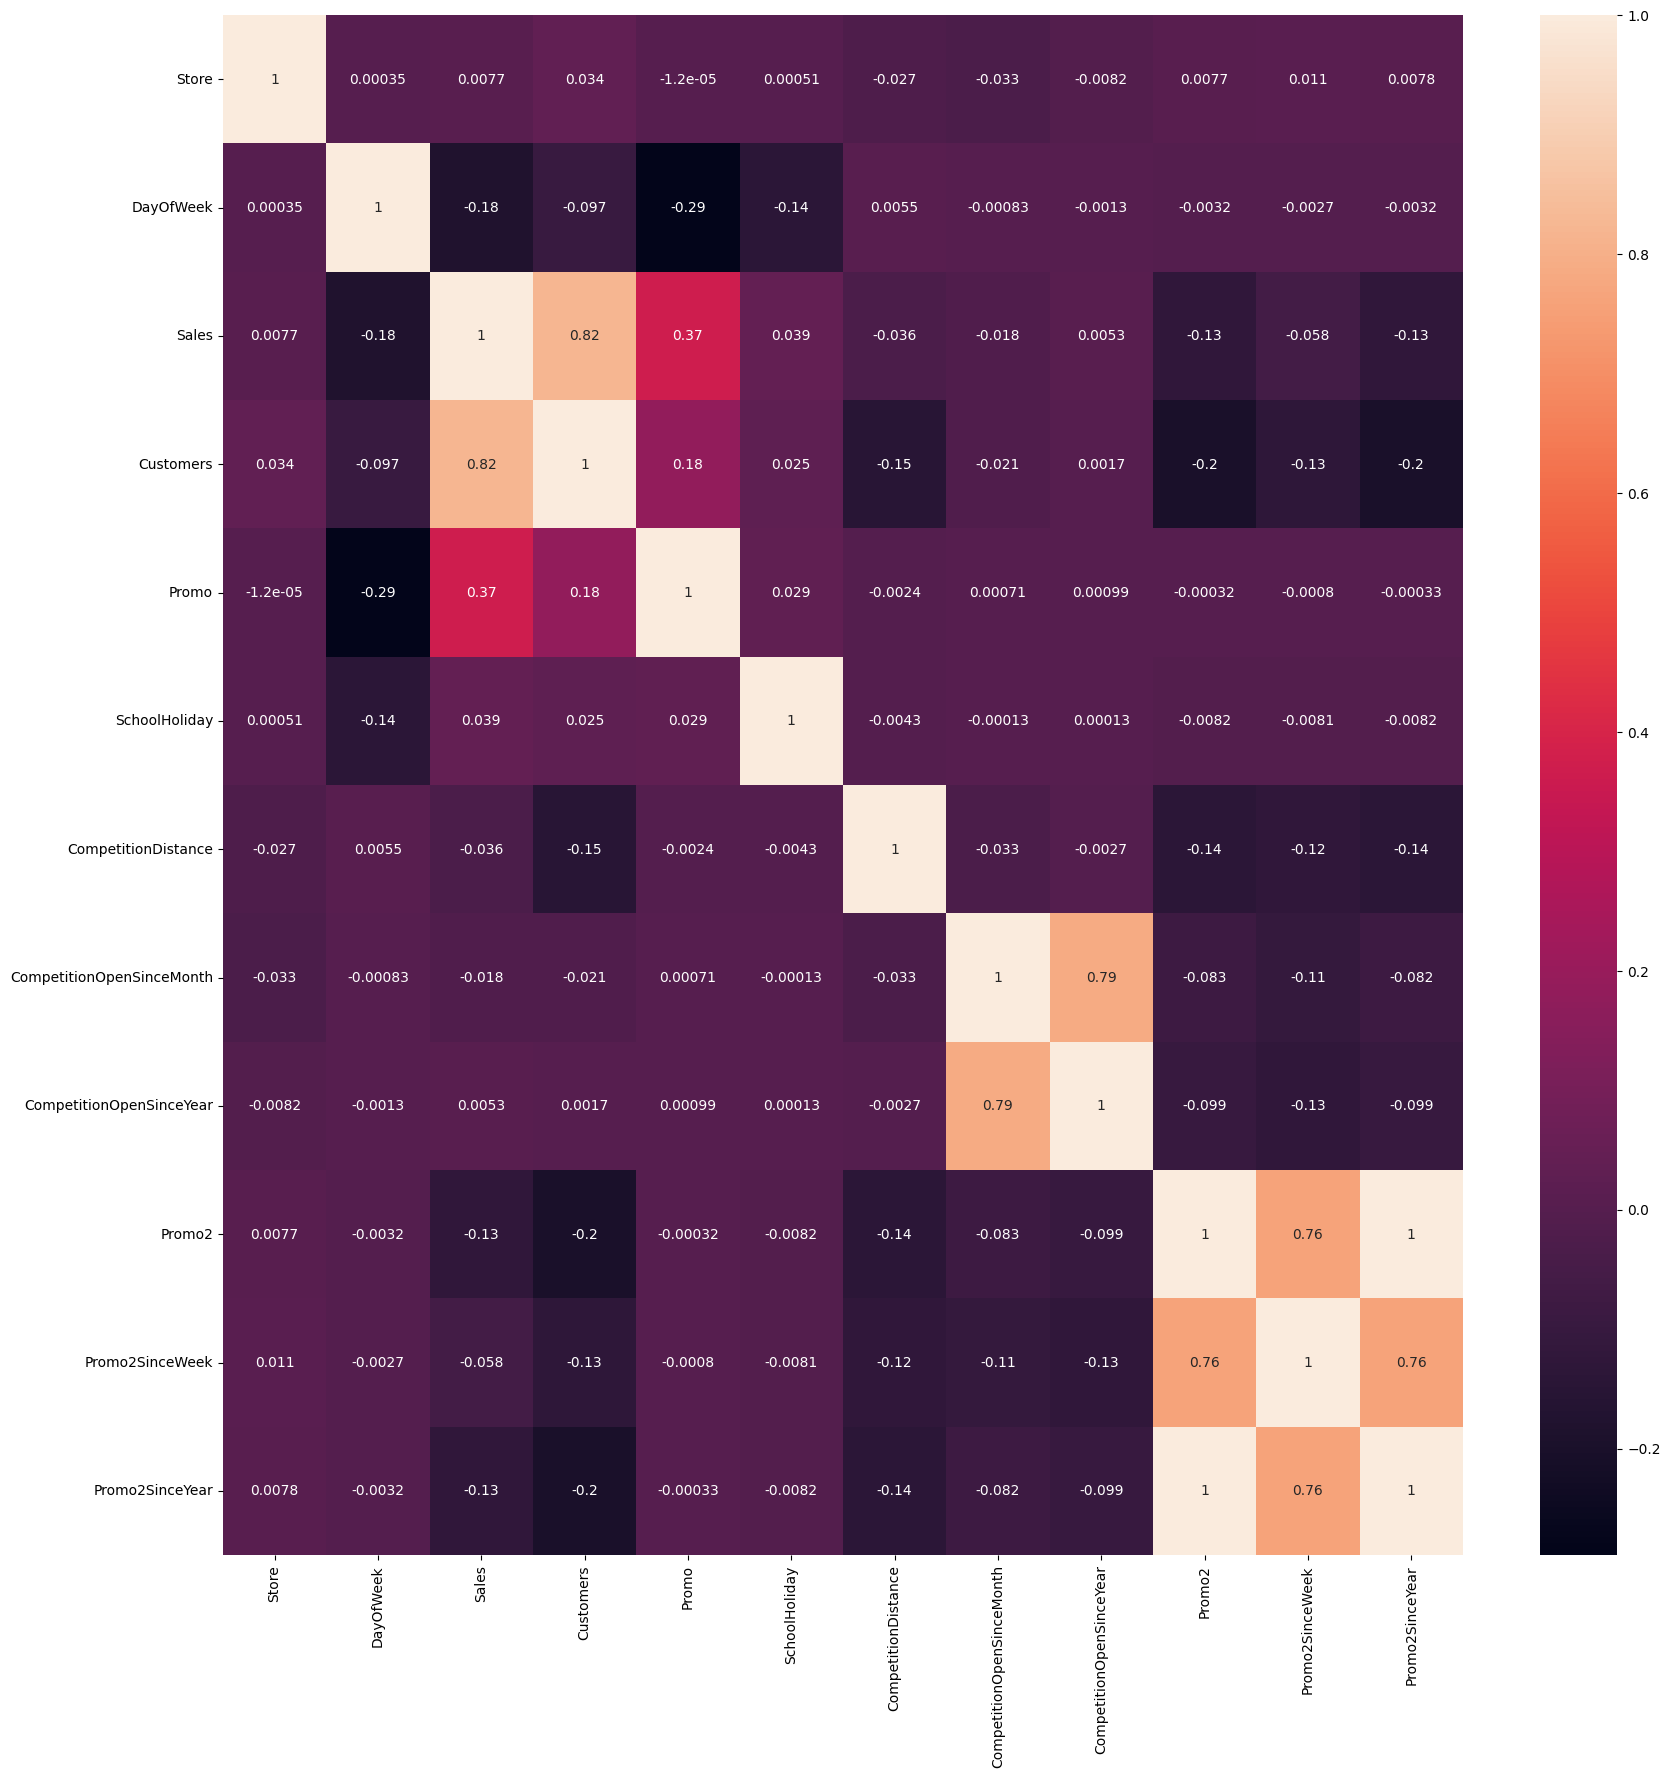

In [35]:
correlations = numeric_columns.corr()
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlations, annot=True)

In [36]:
sales_train_all_df['Year'] = pd.DatetimeIndex(sales_train_all_df['Date']).year
sales_train_all_df['Month'] = pd.DatetimeIndex(sales_train_all_df['Date']).month
sales_train_all_df['Day'] = pd.DatetimeIndex(sales_train_all_df['Date']).day

In [38]:
sales_train_all_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,30
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,29
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,28
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,27


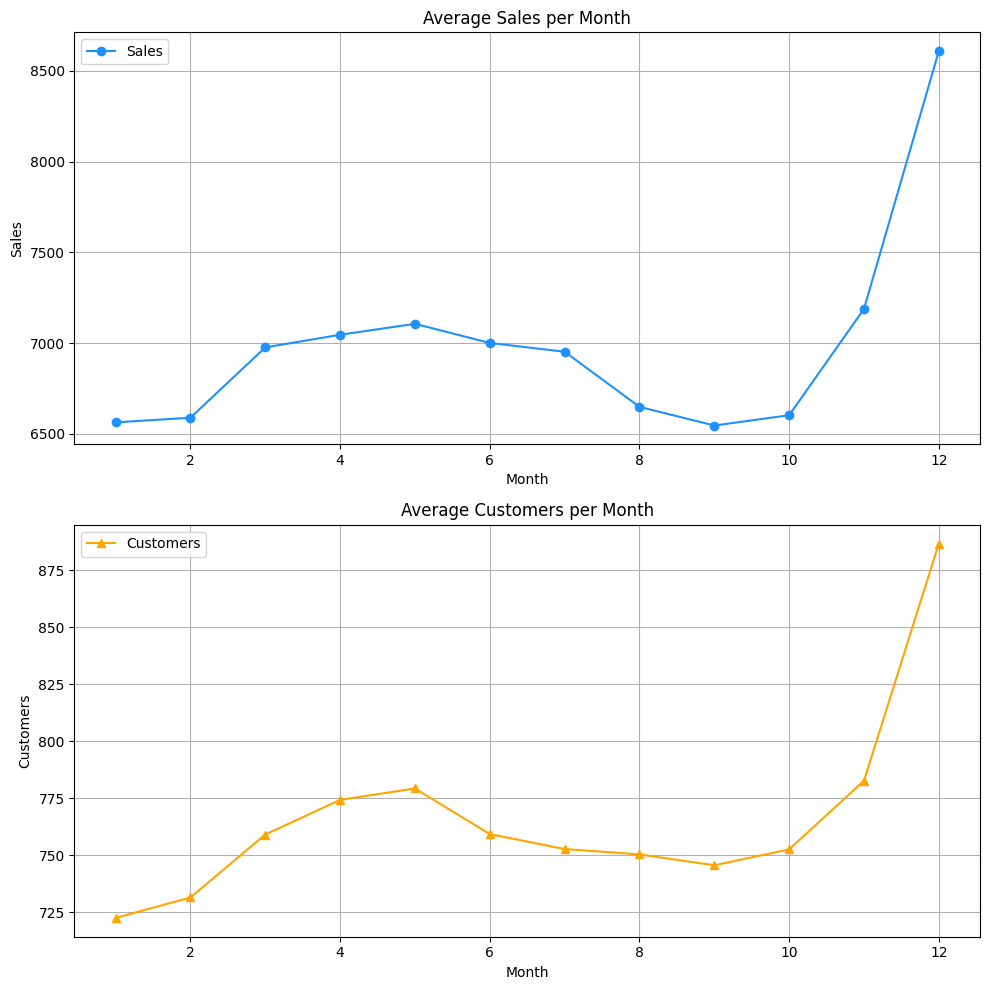

In [40]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

sales_ax = sales_train_all_df.groupby('Month')[['Sales']].mean().plot(ax=axes[0], marker='o', color='dodgerblue')
sales_ax.set_title("Average Sales per Month")
sales_ax.set_xlabel("Month")
sales_ax.set_ylabel("Sales")
sales_ax.grid(True)

customers_ax = sales_train_all_df.groupby('Month')[['Customers']].mean().plot(ax=axes[1], marker='^', color='orange')
customers_ax.set_title("Average Customers per Month")
customers_ax.set_xlabel("Month")
customers_ax.set_ylabel("Customers")
customers_ax.grid(True)

plt.tight_layout()
plt.show()

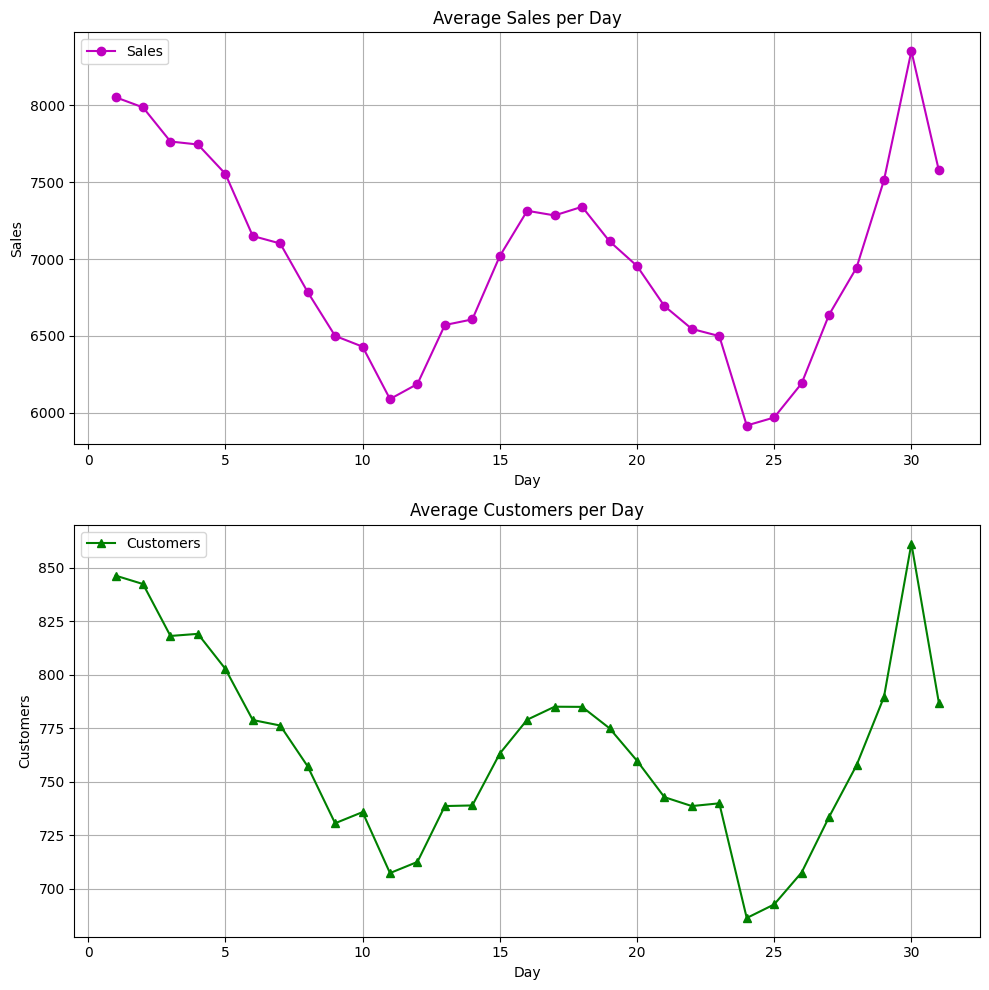

In [43]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

axis = sales_train_all_df.groupby('Day')[['Sales']].mean().plot(ax=axes[0], marker='o', color='m')
axis.set_title("Average Sales per Day")
axis.set_xlabel("Day")
axis.set_ylabel("Sales")
axis.grid(True)

axis = sales_train_all_df.groupby('Day')[['Customers']].mean().plot(ax=axes[1], marker='^', color='g')
axis.set_title("Average Customers per Day")
axis.set_xlabel("Day")
axis.set_ylabel("Customers")
axis.grid(True)

plt.tight_layout()
plt.show()

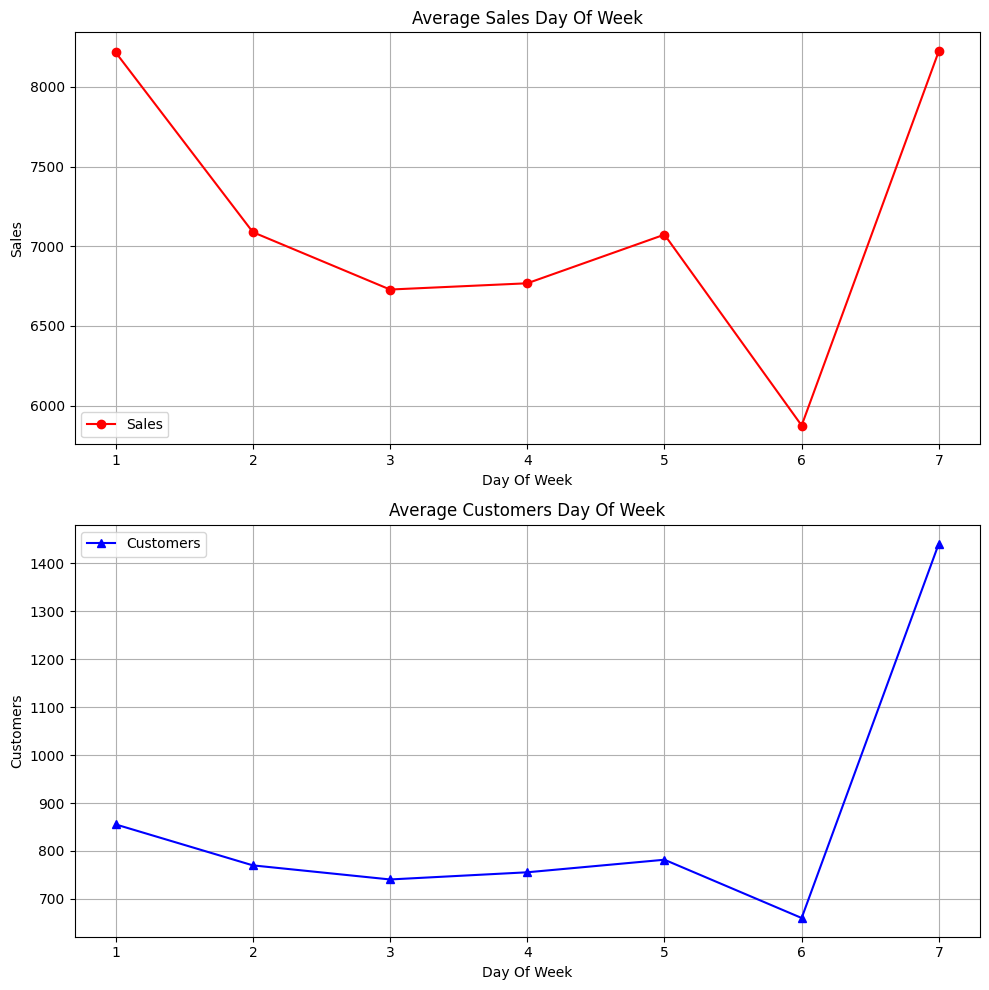

In [49]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

axis = sales_train_all_df.groupby('DayOfWeek')[['Sales']].mean().plot(ax=axes[0], marker='o', color='r')
axis.set_title("Average Sales Day Of Week")
axis.set_xlabel("Day Of Week")
axis.set_ylabel("Sales")
axis.grid(True)

axis = sales_train_all_df.groupby('DayOfWeek')[['Customers']].mean().plot(ax=axes[1], marker='^', color='b')
axis.set_title("Average Customers Day Of Week")
axis.set_xlabel("Day Of Week")
axis.set_ylabel("Customers")
axis.grid(True)

plt.tight_layout()
plt.show()

<ipython-input-55-2b13cd95171f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_train_selected_df['Date'] = pd.to_datetime(sales_train_selected_df['Date'])


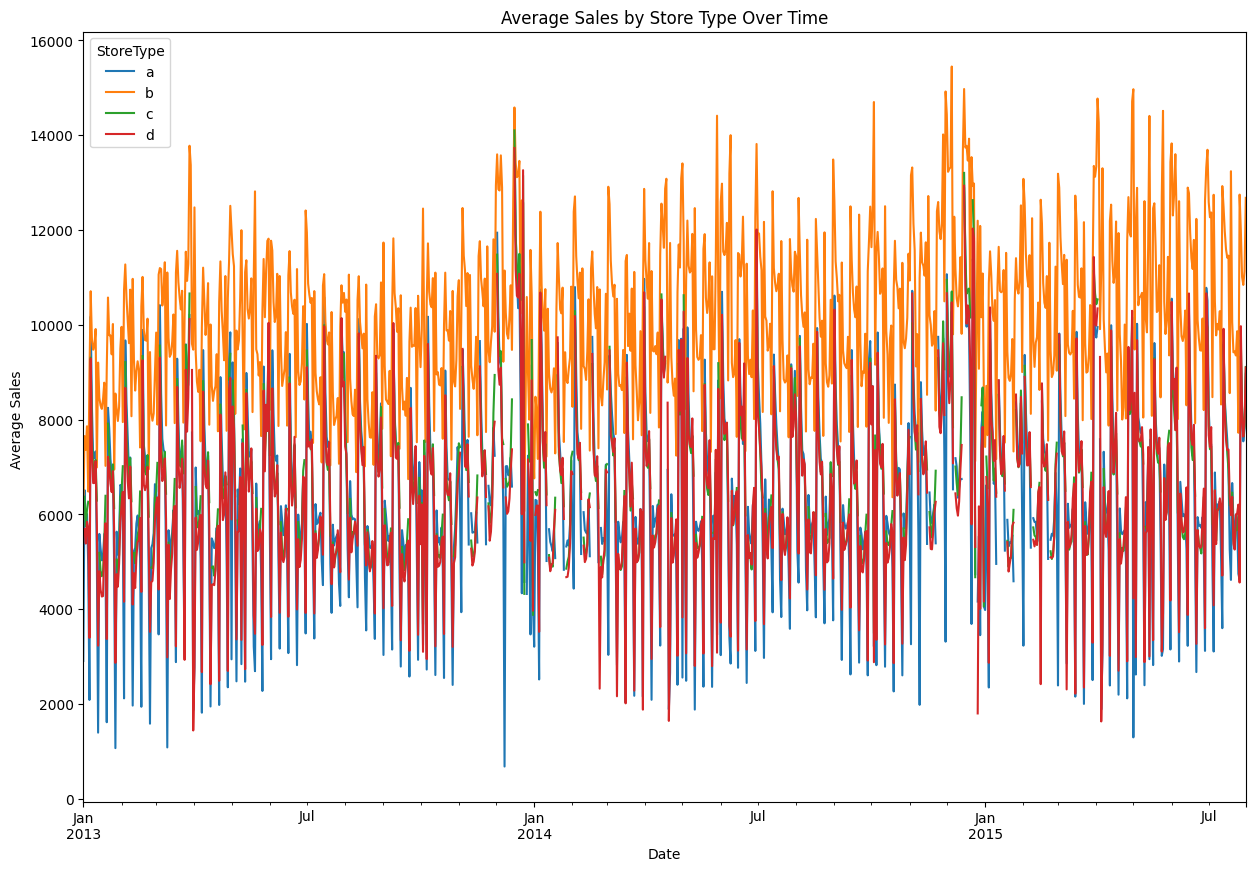

In [55]:
sales_train_selected_df = sales_train_all_df[['Date', 'StoreType', 'Sales']]
sales_train_selected_df['Date'] = pd.to_datetime(sales_train_selected_df['Date'])
sales_grouped = sales_train_selected_df.groupby(['Date', 'StoreType']).mean()['Sales'].unstack()

fig, ax = plt.subplots(figsize=(15, 10))
sales_grouped.plot(ax=ax)
plt.title('Average Sales by Store Type Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sales ')

plt.show()

<ipython-input-60-8c956ce483ec>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Promo', y='Sales', data=sales_train_all_df, palette=colors_sales)
<ipython-input-60-8c956ce483ec>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Promo', y='Customers', data=sales_train_all_df, palette=colors_customers)


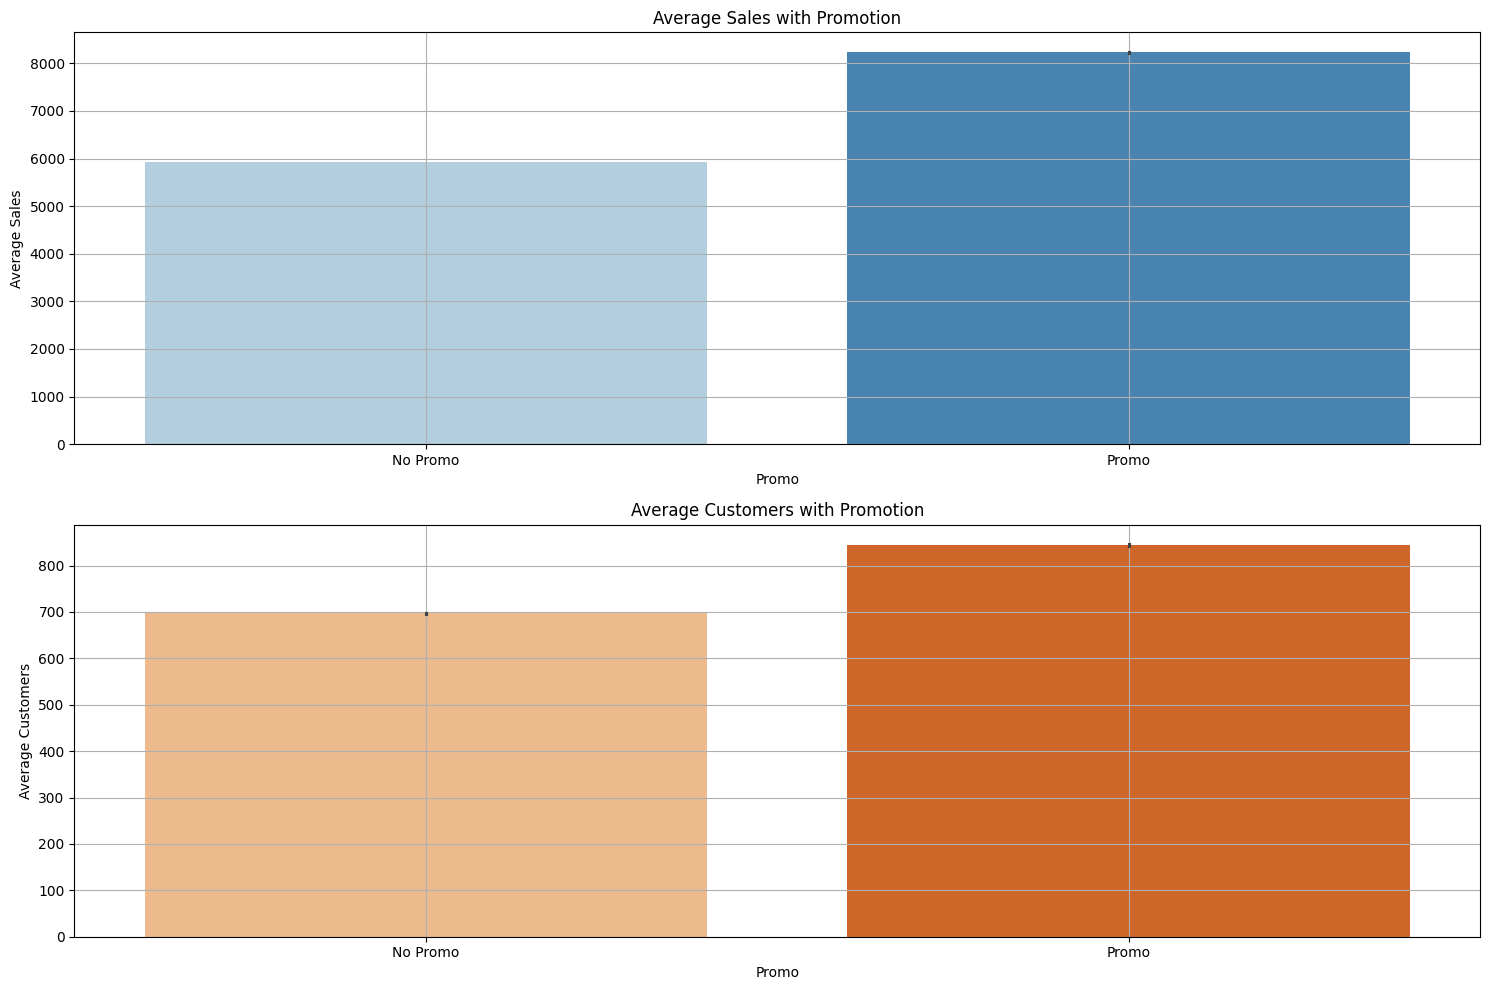

In [60]:
colors_sales = sns.color_palette("Blues", 2)
colors_customers = sns.color_palette("Oranges", 2)
plt.figure(figsize=[15, 10])

plt.subplot(211)
sns.barplot(x='Promo', y='Sales', data=sales_train_all_df, palette=colors_sales)
plt.title('Average Sales with Promotion')
plt.xlabel('Promo')
plt.ylabel('Average Sales')
plt.xticks([0, 1], ['No Promo', 'Promo'])
plt.grid(True)

plt.subplot(212)
sns.barplot(x='Promo', y='Customers', data=sales_train_all_df, palette=colors_customers)
plt.title('Average Customers with Promotion')
plt.xlabel('Promo')
plt.ylabel('Average Customers')
plt.xticks([0, 1], ['No Promo', 'Promo'])
plt.grid(True)

plt.tight_layout()
plt.show()

<ipython-input-63-b2ae01531b4f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Promo', y='Sales', data=sales_train_all_df, palette=colors)
<ipython-input-63-b2ae01531b4f>:5: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.violinplot(x='Promo', y='Sales', data=sales_train_all_df, palette=colors)
<ipython-input-63-b2ae01531b4f>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Promo', y='Customers', data=sales_train_all_df, palette=colors)
<ipython-input-63-b2ae01531b4f>:12: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.violinplot(x='Promo', y='Customers', data=sales_train_

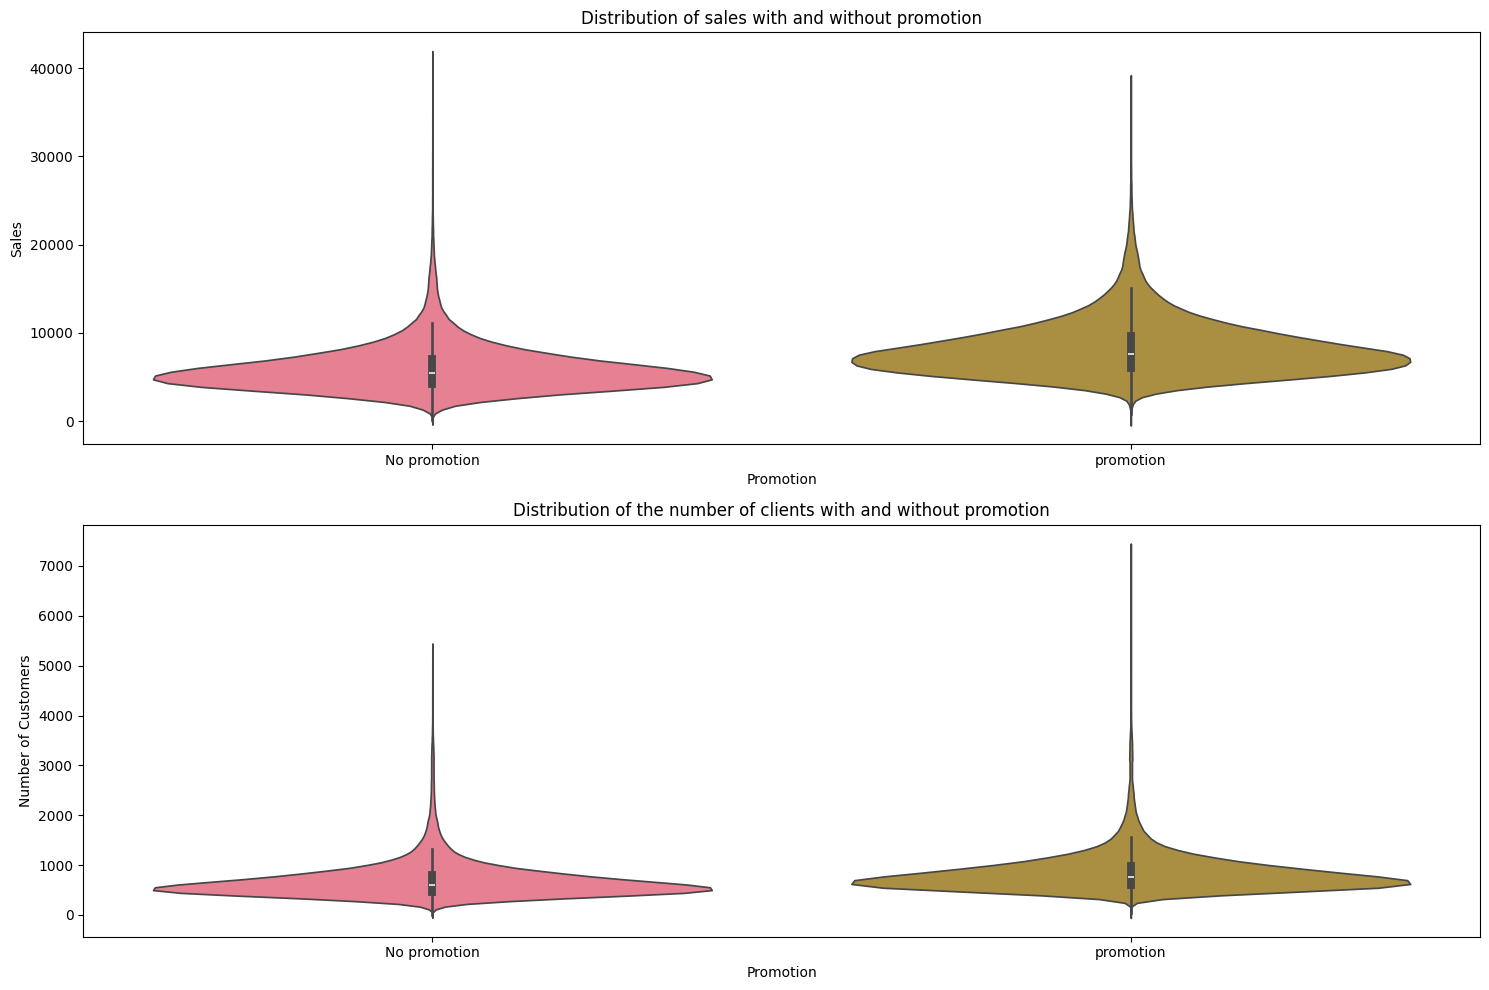

In [63]:
colors = sns.color_palette("husl")
plt.figure(figsize=[15,10])

plt.subplot(211)
sns.violinplot(x='Promo', y='Sales', data=sales_train_all_df, palette=colors)
plt.title('Distribution of sales with and without promotion')
plt.xlabel('Promotion')
plt.ylabel('Sales')
plt.xticks(ticks=[0, 1], labels=['No promotion', 'promotion'])

plt.subplot(212)
sns.violinplot(x='Promo', y='Customers', data=sales_train_all_df, palette=colors)
plt.title('Distribution of the number of clients with and without promotion')
plt.xlabel('Promotion')
plt.ylabel('Number of Customers')
plt.xticks(ticks=[0, 1], labels=['No promotion', 'promotion'])

plt.tight_layout()
plt.show()

# Train Prophet Model

## Prediction Function with Prophet

In [98]:
def sales_predictions(Store_ID, sales_df, periods, plot_title=None, figsize=(20, 10)):
    store_sales_df = sales_df[sales_df['Store'] == Store_ID]
    store_sales_df = store_sales_df[['Date', 'Sales']].rename(columns={'Date': 'ds', 'Sales': 'y'})
    store_sales_df = store_sales_df.sort_values('ds')

    if len(store_sales_df) == 0:
        print(f"No hay datos disponibles para la tienda con ID {Store_ID}")
        return

    model = Prophet()
    model.fit(store_sales_df)
    future = model.make_future_dataframe(periods=periods)
    forecast = model.predict(future)

    fig1 = model.plot(forecast, xlabel="Fecha", ylabel="Ventas", figsize=figsize)
    if plot_title:
        fig1.suptitle(plot_title, fontsize=16)
    fig2 = model.plot_components(forecast, figsize=figsize)

    return fig1, fig2

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2_egsuxo/n5ijyt_6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2_egsuxo/nhy0mwgo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=499', 'data', 'file=/tmp/tmp2_egsuxo/n5ijyt_6.json', 'init=/tmp/tmp2_egsuxo/nhy0mwgo.json', 'output', 'file=/tmp/tmp2_egsuxo/prophet_modelssb7aso8/prophet_model-20240508010722.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:07:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:07:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


(<Figure size 2000x1000 with 1 Axes>, <Figure size 2000x1000 with 3 Axes>)

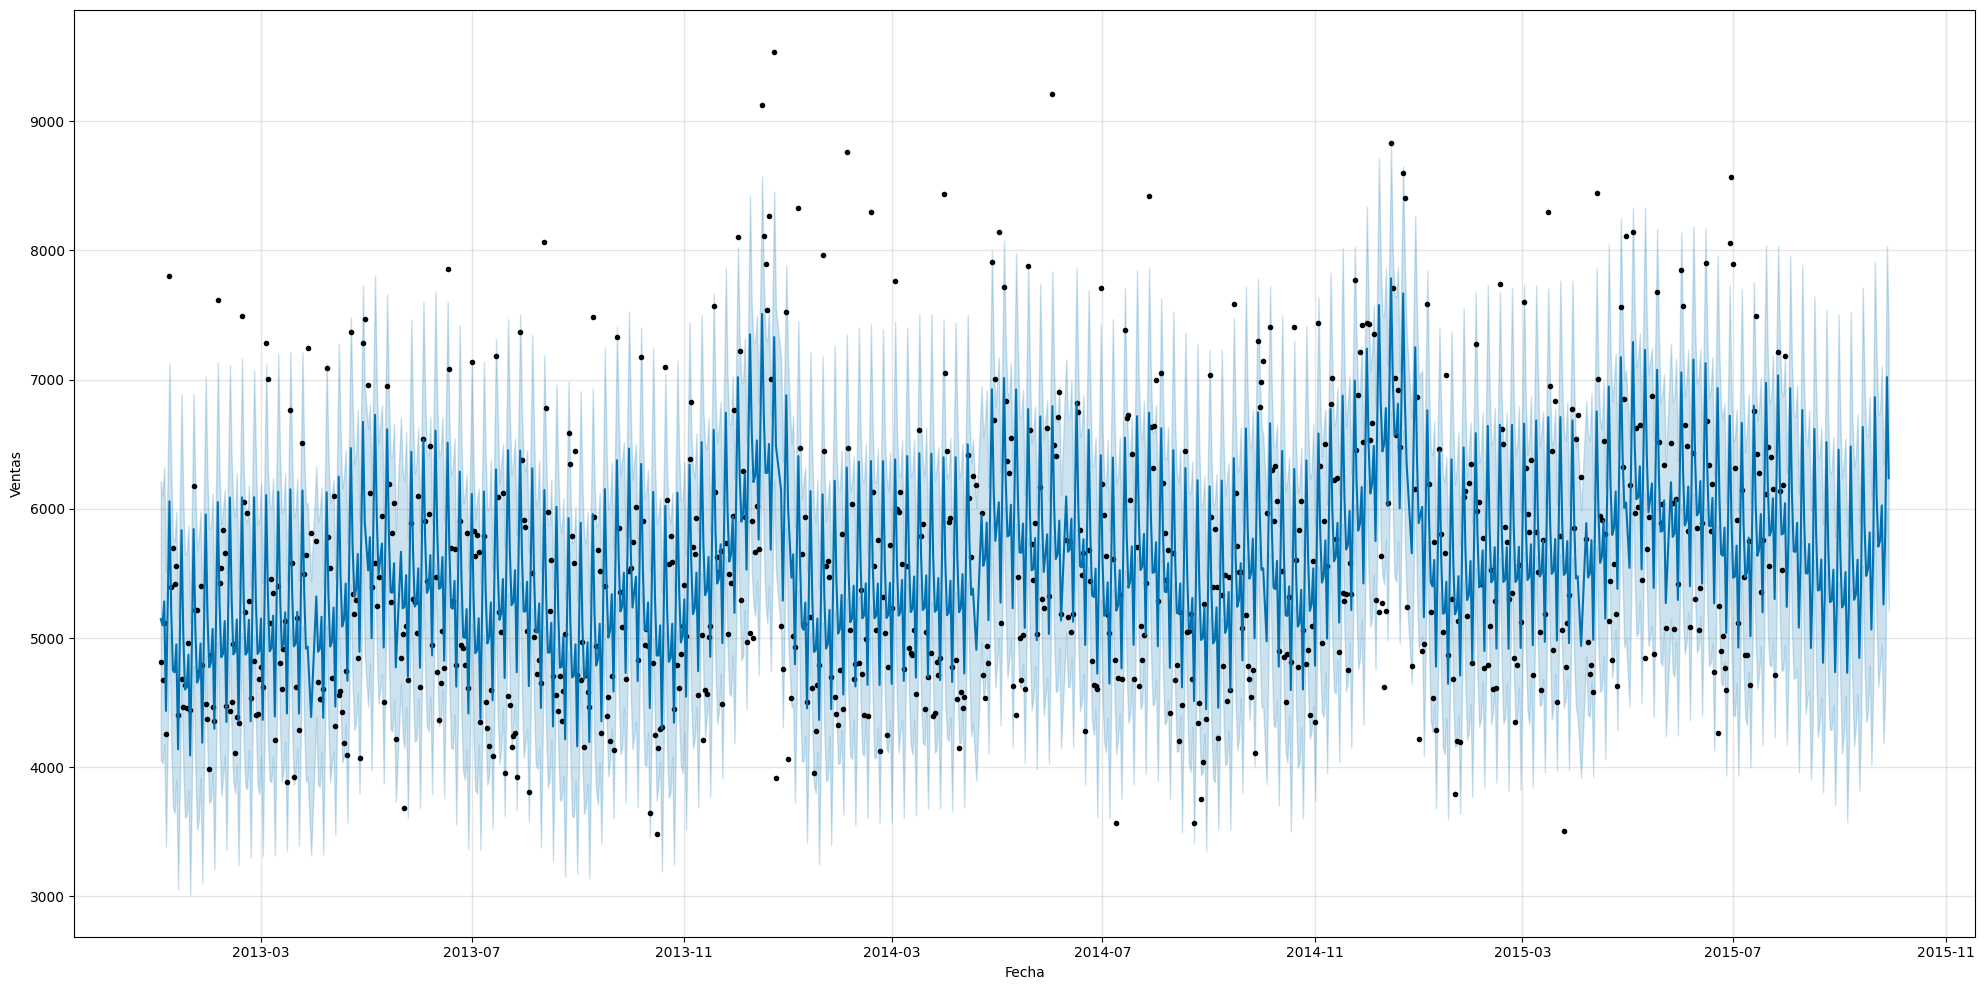

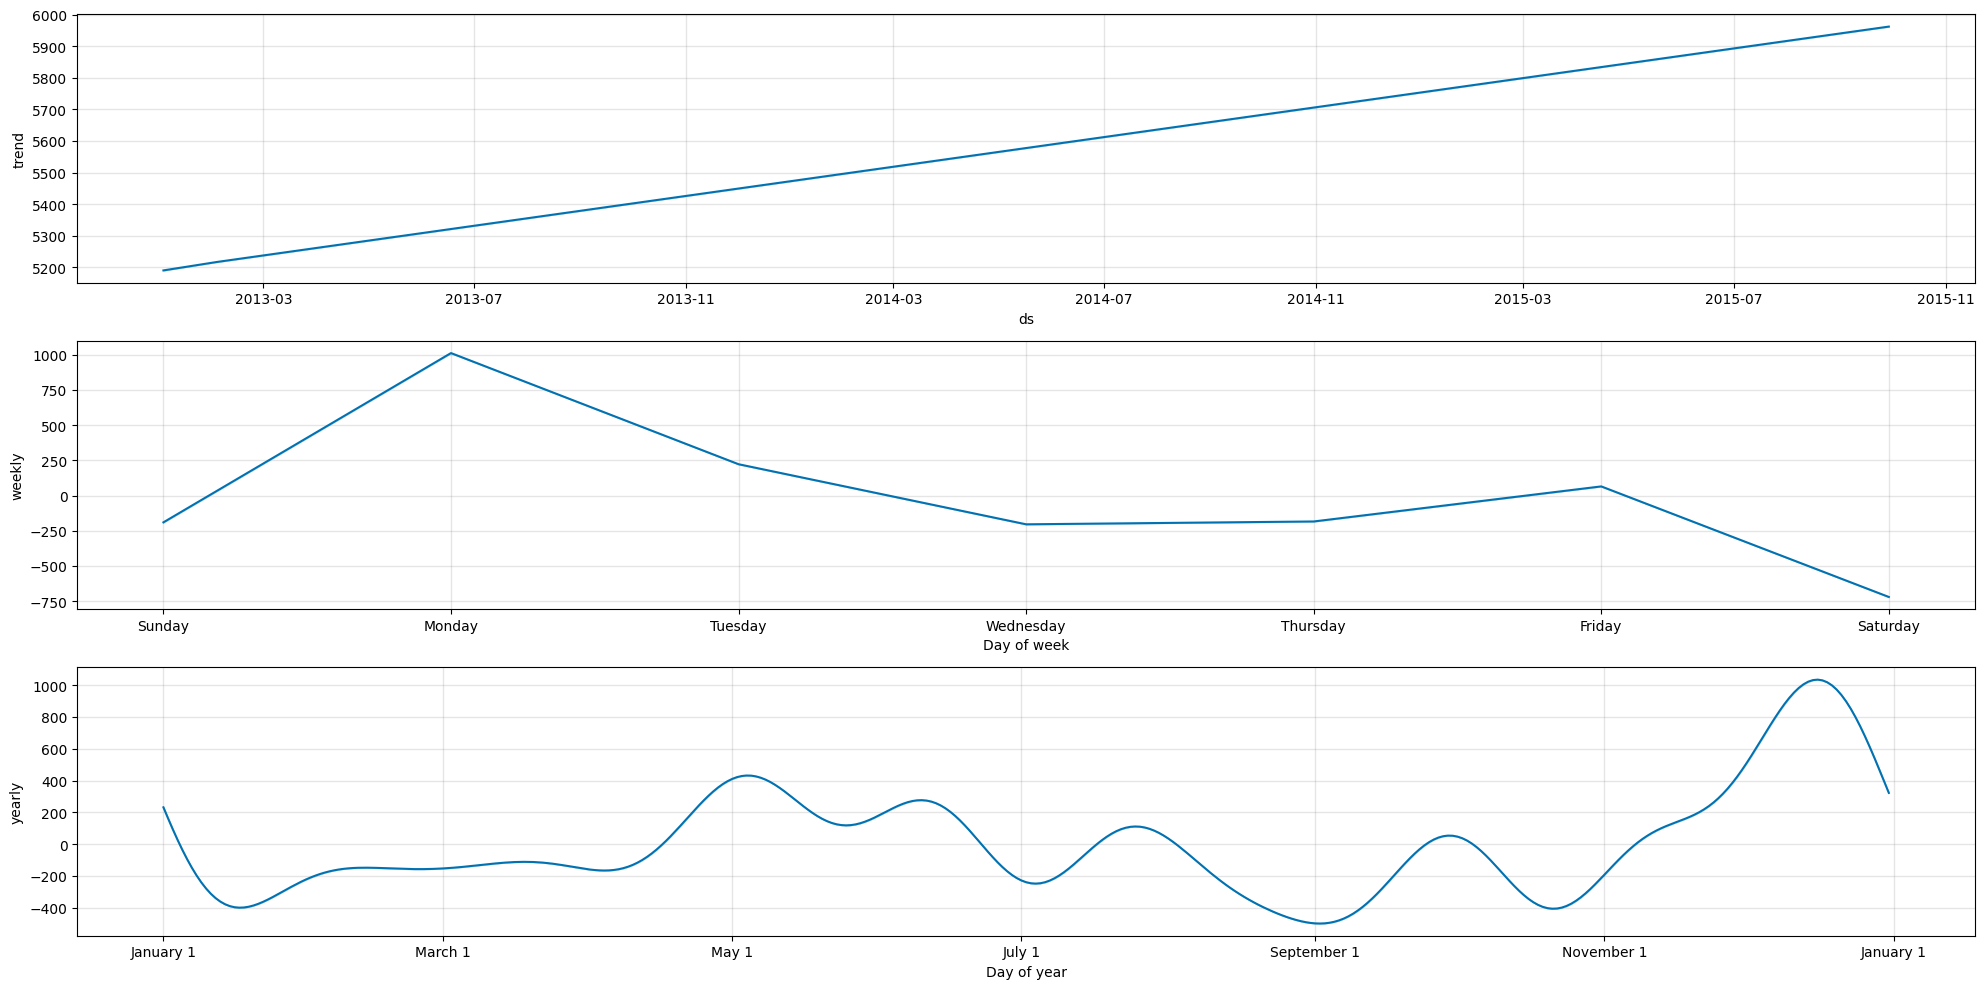

In [99]:
sales_predictions(10, sales_train_all_df, 60)


## Prediction function with Holidays

- StateHoliday: indica si el día era festivo o no (a = vacaciones públicas, b = vacaciones de Pascua holiday, c = Navidades, 0 = No era festivo)
- SchoolHoliday: indica si (Store, Date) se ve afectado por el cierre de las escuelas públicas
  






In [111]:
def sales_predictions(Store_ID, sales_df, holidays, periods, plot_title=None, figsize=(20, 10)):
    store_sales_df = sales_df[sales_df['Store'] == Store_ID]
    store_sales_df = store_sales_df[['Date', 'Sales']].rename(columns={'Date': 'ds', 'Sales': 'y'})
    store_sales_df = store_sales_df.sort_values('ds')

    if len(store_sales_df) == 0:
        print(f"No hay datos disponibles para la tienda con ID {Store_ID}")
        return

    model = Prophet(holidays=holidays)
    model.fit(store_sales_df)
    future = model.make_future_dataframe(periods=periods)
    forecast = model.predict(future)

    fig1 = model.plot(forecast, xlabel="Fecha", ylabel="Ventas", figsize=figsize)
    if plot_title:
        fig1.suptitle(plot_title, fontsize=16)
    fig2 = model.plot_components(forecast, figsize=figsize)

    return fig1, fig2

# School Holidays

In [100]:
school_holidays = sales_train_all_df[sales_train_all_df['SchoolHoliday'] == 1].loc[:, 'Date'].values

In [101]:
school_holidays = np.unique(school_holidays)

In [102]:
state_holidays = sales_train_all_df[(sales_train_all_df['StateHoliday'] == 'a') | (sales_train_all_df['StateHoliday'] == 'b') | (sales_train_all_df['StateHoliday'] == 'c')].loc[:, 'Date'].values

In [103]:
state_holidays = np.unique(state_holidays)

In [104]:
school_holidays = pd.DataFrame({'ds': pd.to_datetime(school_holidays),
                                'holiday': 'school_holiday'})

In [105]:
school_holidays.head()

,ds,holiday
0,2013-01-01,school_holiday
1,2013-01-02,school_holiday
2,2013-01-03,school_holiday
3,2013-01-04,school_holiday
4,2013-01-05,school_holiday


# State Holidays

In [106]:
state_holidays = pd.DataFrame({'ds': pd.to_datetime(state_holidays),
                                'holiday': 'state_holiday'})

In [107]:
state_holidays.head()

,ds,holiday
0,2013-01-01,state_holiday
1,2013-01-06,state_holiday
2,2013-03-29,state_holiday
3,2013-04-01,state_holiday
4,2013-05-01,state_holiday


# Join Holidays

In [108]:
school_state_holidays = pd.concat((state_holidays, school_holidays), axis = 0)

In [109]:
school_state_holidays.head()

,ds,holiday
0,2013-01-01,state_holiday
1,2013-01-06,state_holiday
2,2013-03-29,state_holiday
3,2013-04-01,state_holiday
4,2013-05-01,state_holiday


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2_egsuxo/z1qtfcj6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2_egsuxo/g2vabr30.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90578', 'data', 'file=/tmp/tmp2_egsuxo/z1qtfcj6.json', 'init=/tmp/tmp2_egsuxo/g2vabr30.json', 'output', 'file=/tmp/tmp2_egsuxo/prophet_modelkkts9fye/prophet_model-20240508010815.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:08:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:08:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


(<Figure size 2000x1000 with 1 Axes>, <Figure size 2000x1000 with 4 Axes>)

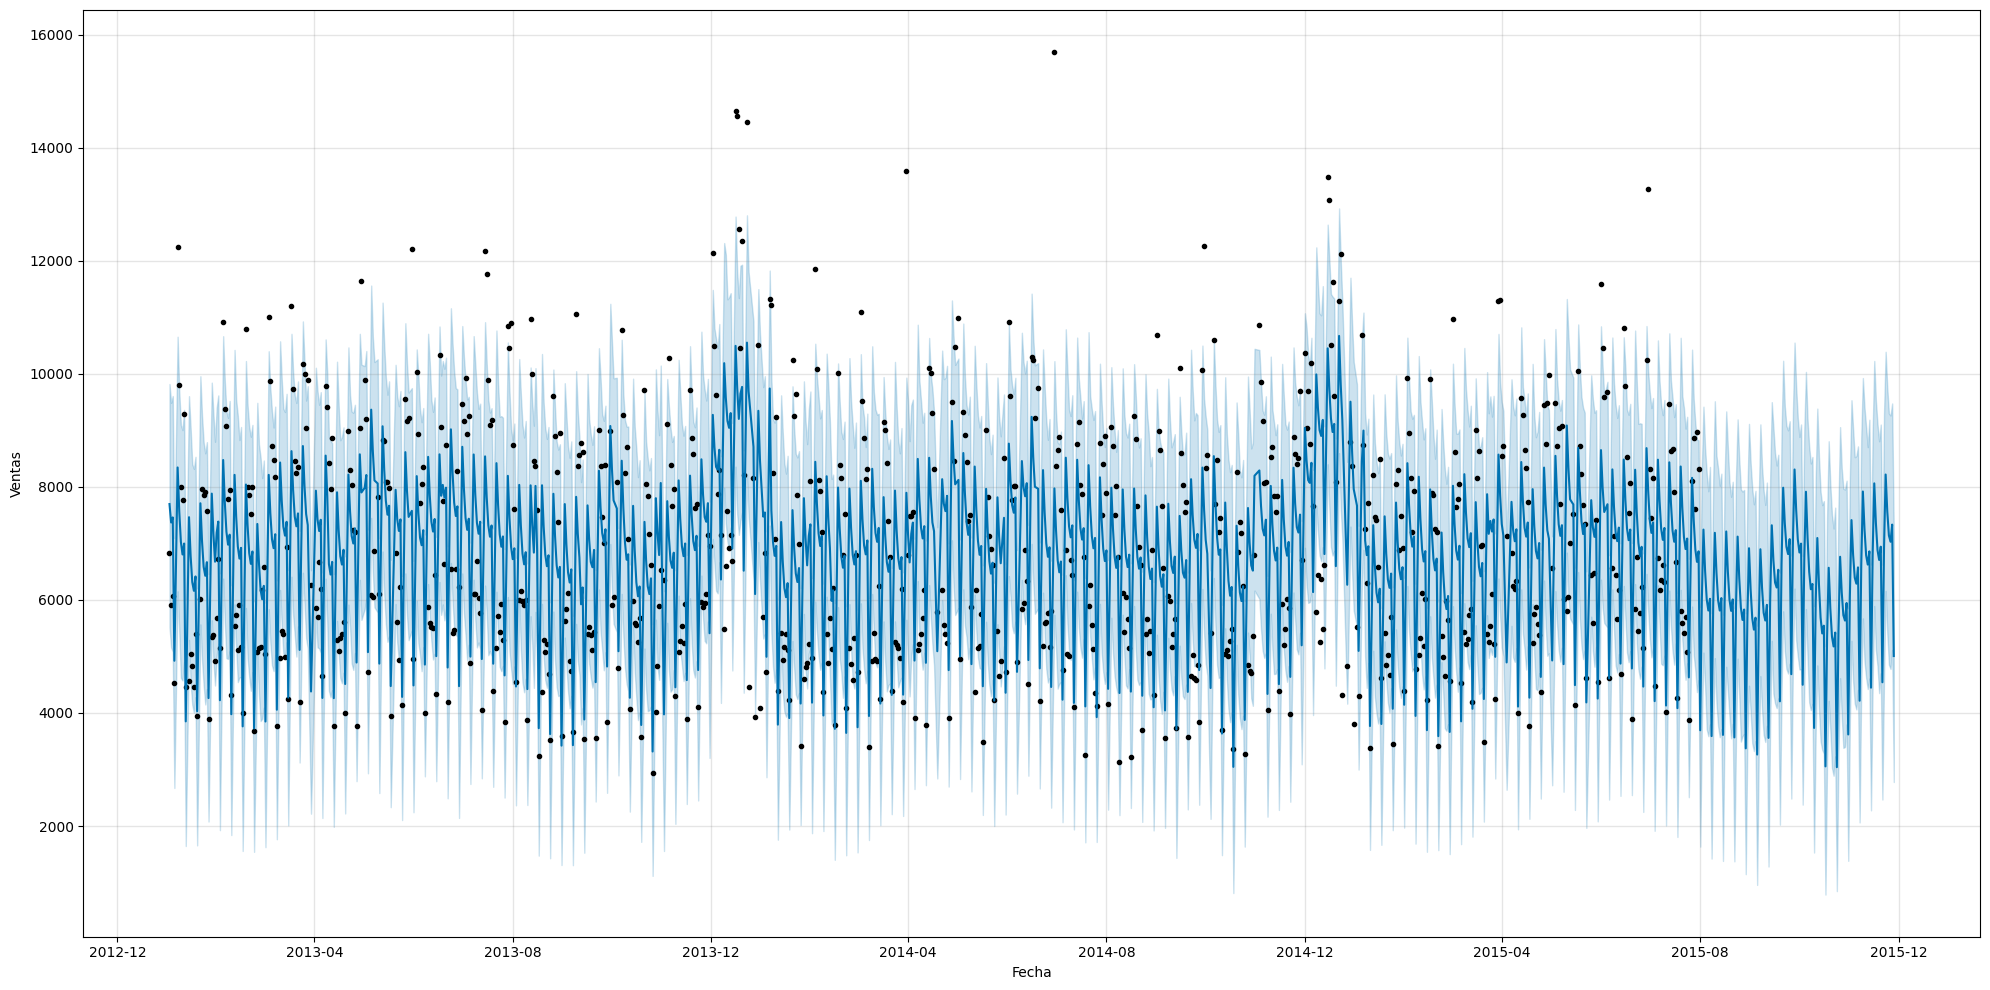

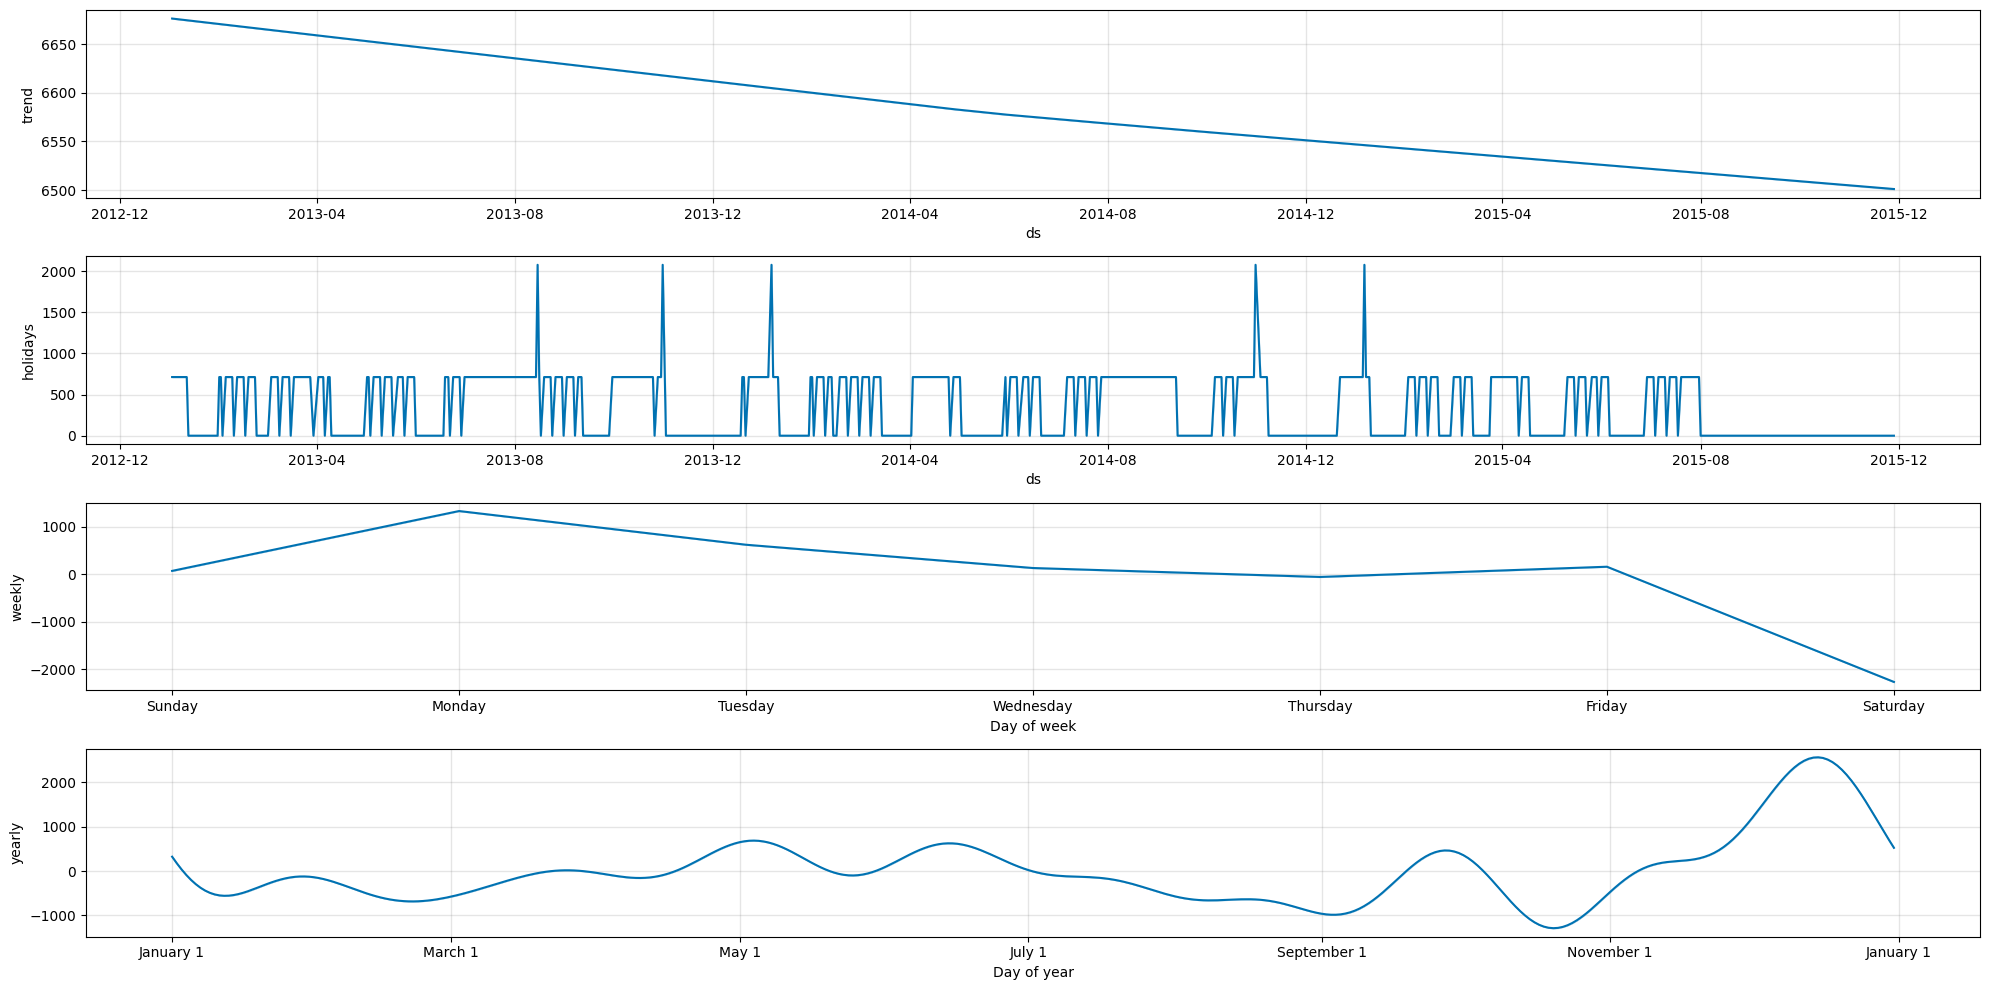

In [112]:
sales_predictions(3, sales_train_all_df, school_state_holidays, 120)